Лабораторна работа №5
студентки гр.БС-83
Павельчак Катерини

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd, xlwt

In [78]:
table = pd.DataFrame({'Grupa1':[33,32,34,35,34,35,34],
                      'Grupa2':[31,30,32,34,33,33,34]},
                    index = ['Ozn_1','Ozn_2','Ozn_3','Ozn_4','Ozn_5','Ozn_6','Ozn_7'])
table

,Grupa1,Grupa2
Ozn_1,33,31
Ozn_2,32,30
Ozn_3,34,32
Ozn_4,35,34
Ozn_5,34,33
Ozn_6,35,33
Ozn_7,34,34


Побудувати графік, що відображає розподіл ознак в групах

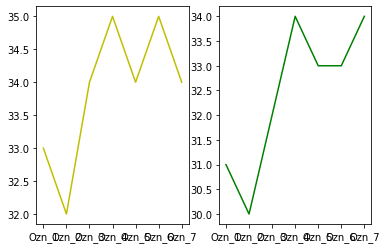

In [79]:
plt.subplot(1, 2, 1) 
plt.plot(table.index, table['Grupa1'], 'y')

plt.subplot(1, 2, 2) 
plt.plot(table.index, table['Grupa2'], 'g')

Написати функцію, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях 0,01 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною

In [83]:
def pirson (table, significant_level, num_level):
    z = 0
    prob = 0
    x_emp = 0
    gr_n=[]   #(n-n')^2
    gr_n_div=[] #(n-n')^2 / n'
    
    l_st=len(table.iloc[:,0])
    for i in range(l_st):
        z = table.iloc[i,0] - table.iloc[i,1]
        z_sq = z**2 #(n-n')^2
        gr_n.append(z_sq)
        z_sq_div = z_sq/table.iloc[i,1] #(n-n')^2 / n'
        gr_n_div.append(z_sq_div)
        x_emp += z_sq_div 
   
    table["(n-n')^2"] = gr_n  
    table["(n-n')^2 / n"] = gr_n_div
    print(table)
    print('')
    print("Сума отриманих значень: χ^2 =",x_emp)
    r= l_st - 1 #ступінь свободи критерію
    print("Ступінь свободи: r =",r)
    
    import xlrd, xlwt
    rb = xlrd.open_workbook('Таблиця критичних значень для критерію Пірсона.xlsx')
    sheet = rb.sheet_by_index(0)
    x_kr = sheet.row_values(r+1)[num_level]
    print("χ^2 критичне = ", x_kr)
    
    text = 0   
    if((x_emp**2) > (x_kr**2)):
        text = "Розбіжність значима бо χ^2 > χ^2(критичне)"%table
    else:
        text = "Розбіжність незначима бо χ^2 < χ^2(критичне)"%table
    print(text)
    print("")    

In [84]:
pirson (table, 0.01, 1) #("1" є номером стовпця в таблиці для 0.01)

       Grupa1  Grupa2  (n-n')^2  (n-n')^2 / n
Ozn_1      33      31         4      0.129032
Ozn_2      32      30         4      0.133333
Ozn_3      34      32         4      0.125000
Ozn_4      35      34         1      0.029412
Ozn_5      34      33         1      0.030303
Ozn_6      35      33         4      0.121212
Ozn_7      34      34         0      0.000000

Сума отриманих значень: χ^2 = 0.5682925076188833
Ступінь свободи: r = 6
χ^2 критичне =  16.8
Розбіжність незначима бо χ^2 < χ^2(критичне)



In [85]:
pirson (table, 0.05, 2) #("1" є номером стовпця в таблиці для 0.05)

       Grupa1  Grupa2  (n-n')^2  (n-n')^2 / n
Ozn_1      33      31         4      0.129032
Ozn_2      32      30         4      0.133333
Ozn_3      34      32         4      0.125000
Ozn_4      35      34         1      0.029412
Ozn_5      34      33         1      0.030303
Ozn_6      35      33         4      0.121212
Ozn_7      34      34         0      0.000000

Сума отриманих значень: χ^2 = 0.5682925076188833
Ступінь свободи: r = 6
χ^2 критичне =  12.6
Розбіжність незначима бо χ^2 < χ^2(критичне)



Додати до таблиці стовбчики з відсотовим розподілом по градаціям всередині груп. Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами)


In [87]:
s1 = 0
s2 = 0
long=len(table.iloc[:,0])

for i in range(long):
    s1 += table.iloc[i,0]
for i in range(long):
    s2 += table.iloc[i,1]

gr_1 = []
gr_2 = []
tmp1 = 0
for i in range(long):
    tmp1 = (table.iloc[i,0] * 100) / s1
    tmp1 = float('{:.5f}'.format(tmp1))
    gr_1.append(tmp1)

tmp2 = 0
for i in range(long):
    tmp2 = (table.iloc[i,1] * 100) / s2
    tmp2 = float('{:.5f}'.format(tmp2)) 
    gr_2.append(tmp2)

new_table = pd.DataFrame({'Grupa1':[33,32,34,35,34,35,34],
                      'Grupa2':[31,30,32,34,33,33,34]},
                    index = ['Ozn_1','Ozn_2','Ozn_3','Ozn_4','Ozn_5','Ozn_6','Ozn_7'])

new_table["Grupa1 %"] = gr_1       
new_table["Grupa2 %"] = gr_2
print(new_table)

       Grupa1  Grupa2  Grupa1 %  Grupa2 %
Ozn_1      33      31  13.92405  13.65639
Ozn_2      32      30  13.50211  13.21586
Ozn_3      34      32  14.34599  14.09692
Ozn_4      35      34  14.76793  14.97797
Ozn_5      34      33  14.34599  14.53744
Ozn_6      35      33  14.76793  14.53744
Ozn_7      34      34  14.34599  14.97797



Реультати всієї роботи критерію:

In [89]:
result_table = pd.DataFrame( {"Рівень значимості":[pirson(table, 0.01, 1), pirson (table, 0.05, 2)]},
                        index = ["0.01","0.05"])
result_table.columns.name = "significant level"
result_table

       Grupa1  Grupa2  (n-n')^2  (n-n')^2 / n
Ozn_1      33      31         4      0.129032
Ozn_2      32      30         4      0.133333
Ozn_3      34      32         4      0.125000
Ozn_4      35      34         1      0.029412
Ozn_5      34      33         1      0.030303
Ozn_6      35      33         4      0.121212
Ozn_7      34      34         0      0.000000

Сума отриманих значень: χ^2 = 0.5682925076188833
Ступінь свободи: r = 6
χ^2 критичне =  16.8
Розбіжність незначима бо χ^2 < χ^2(критичне)

       Grupa1  Grupa2  (n-n')^2  (n-n')^2 / n
Ozn_1      33      31         4      0.129032
Ozn_2      32      30         4      0.133333
Ozn_3      34      32         4      0.125000
Ozn_4      35      34         1      0.029412
Ozn_5      34      33         1      0.030303
Ozn_6      35      33         4      0.121212
Ozn_7      34      34         0      0.000000

Сума отриманих значень: χ^2 = 0.5682925076188833
Ступінь свободи: r = 6
χ^2 критичне =  12.6
Розбіжність незначима бо χ^2 <

significant level,Рівень значимості
0.01,None
0.05,None
